<div style="width: 100%; overflow: hidden;">
    <div style="width: 150px; float: left;"> <img src="https://raw.githubusercontent.com/DataForScience/Networks/master/data/D4Sci_logo_ball.png" alt="Data For Science, Inc" align="left" border="0" width=150px> </div>
    <div style="float: left; margin-left: 10px;"> <h1>Interactive Visualization</h1>
<h1>matplotlib animations</h1>
        <p>Bruno Gonçalves<br/>
        <a href="http://www.data4sci.com/">www.data4sci.com</a><br/>
            @bgoncalves, @data4sci</p></div>
</div>

In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt 
from matplotlib.animation import FuncAnimation, FFMpegWriter
from mpl_toolkits.mplot3d import Axes3D

from IPython import display

import watermark

%load_ext watermark
%matplotlib notebook

# Turn off matplotlib plot in Notebook
plt.ioff()

We start by print out the versions of the libraries we're using for future reference

In [2]:
%watermark -n -v -m -g -iv

Python implementation: CPython
Python version       : 3.10.9
IPython version      : 8.10.0

Compiler    : Clang 14.0.6 
OS          : Darwin
Release     : 22.5.0
Machine     : x86_64
Processor   : i386
CPU cores   : 16
Architecture: 64bit

Git hash: 2345c1692f052b1bf9355f990119db5c25a85da0

numpy     : 1.23.5
matplotlib: 3.7.0
pandas    : 1.5.3
IPython   : 8.10.0
watermark : 2.4.2



Let us start with the simplest example of an animation

In [3]:
fig = plt.figure()
ax = plt.axes(xlim=(0, 4), ylim=(-2, 2))
line, = ax.plot([], [], lw=3)

def init():
    line.set_data([], [])
    return line,

def animate(i):
    x = np.linspace(0, 4, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, blit=True,
                               repeat=True)

# Display the animation as an HTML video
video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)

Read the volcano data file

In [4]:
data = pd.read_csv('data/volcano.csv')

In [5]:
data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61
0,100,100,101,101,101,101,101,100,100,100,...,107,107,107,106,106,105,105,104,104,103
1,101,101,102,102,102,102,102,101,101,101,...,108,108,107,107,106,106,105,105,104,104
2,102,102,103,103,103,103,103,102,102,102,...,109,108,108,107,107,106,106,105,105,104
3,103,103,104,104,104,104,104,103,103,103,...,109,109,108,108,107,107,106,106,105,105
4,104,104,105,105,105,105,105,104,104,103,...,110,109,109,108,107,107,107,106,106,105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,99,99,99,99,100,100,101,101,102,102,...,95,95,95,95,94,94,94,94,94,94
83,98,99,99,99,99,100,100,101,101,102,...,95,95,94,94,94,94,94,94,94,94
84,98,98,98,99,99,99,100,100,101,101,...,94,94,94,94,94,94,94,94,94,94
85,97,98,98,98,99,99,99,100,100,100,...,94,94,94,94,94,94,94,94,94,94


<IPython.core.display.Javascript object>


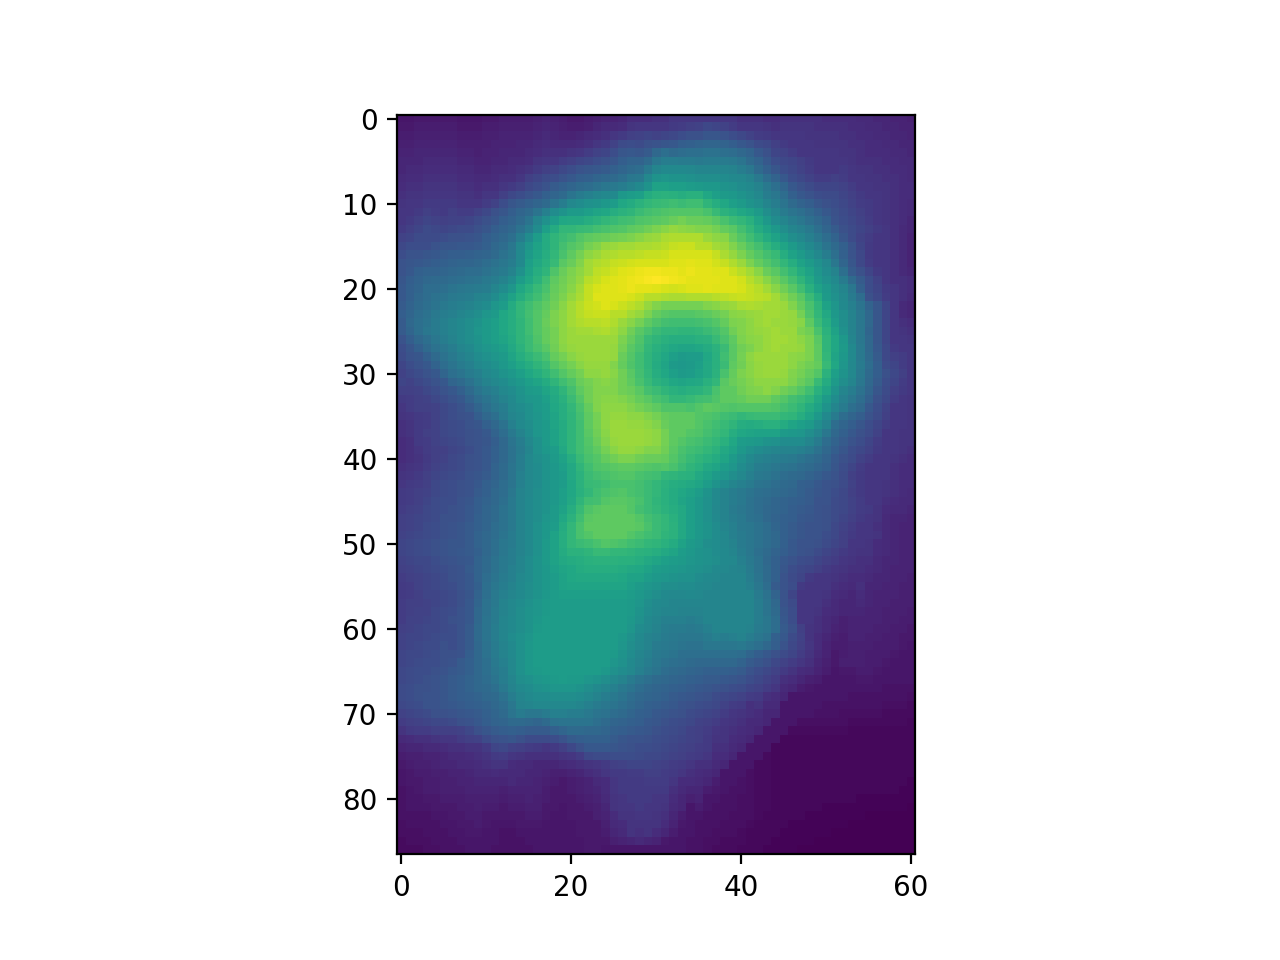

In [6]:
fig, ax = plt.subplots(1)
ax.imshow(data)
fig.show()

Transform to column format

In [7]:
df = data.unstack().reset_index()
df.columns=["X", "Y", "Z"]

In [8]:
df

,X,Y,Z
0,V1,0,100
1,V1,1,101
2,V1,2,102
3,V1,3,103
4,V1,4,104
...,...,...,...
5302,V61,82,94
5303,V61,83,94
5304,V61,84,94
5305,V61,85,94


Transform the old column name into a numeric value

In [9]:
df['X'] = pd.Categorical(df['X'])
df['X'] = df['X'].cat.codes

In [10]:
df

,X,Y,Z
0,0,0,100
1,0,1,101
2,0,2,102
3,0,3,103
4,0,4,104
...,...,...,...
5302,57,82,94
5303,57,83,94
5304,57,84,94
5305,57,85,94


In [11]:
%%time

fig, ax = plt.subplots(1, subplot_kw={'projection': '3d'})

# Plot the surface of the vulcano
ax.plot_trisurf(df['X'], df['Y'], df['Z'], 
                cmap=plt.cm.viridis, linewidth=0.2)

def animate(angle):
    ax = plt.gca()
    
    # Rotate the figure by steps of 5 degrees
    ax.view_init(30, 1*angle)

anim = FuncAnimation(fig, animate,
                        frames=200, interval=20, blit=True,
                        repeat=True)

# Display the animation as an HTML video
video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)

CPU times: user 2min 37s, sys: 58.5 s, total: 3min 35s
Wall time: 1min 3s


Save GIF file

In [12]:
%%time

fig, ax = plt.subplots(1,subplot_kw={'projection': '3d'})
ax.plot_trisurf(df['Y'], df['X'], df['Z'], cmap=plt.cm.viridis, linewidth=0.2)

def animate(angle):
    ax = plt.gca()
    ax.view_init(30, angle)

anim = FuncAnimation(fig, animate,
                        frames=200, interval=20, blit=True,
                        repeat=True)

# Save the animation as a GIF
anim.save('data/volcano.gif')

CPU times: user 2min 39s, sys: 55.8 s, total: 3min 35s
Wall time: 1min 5s


In [13]:
!open -a /Applications/Firefox.app data/volcano.gif

Save MP4 file

In [14]:
%%time

fig, ax = plt.subplots(1,subplot_kw={'projection': '3d'})
ax.plot_trisurf(df['Y'], df['X'], df['Z'], cmap=plt.cm.viridis, linewidth=0.2)

def animate(angle):
    ax = plt.gca()
    ax.view_init(30, angle)

anim = FuncAnimation(fig, animate,
                        frames=200, interval=20, blit=True,
                        repeat=True)

writervideo = FFMpegWriter(fps=60) 
anim.save("data/volcano.mp4", writer=writervideo)

CPU times: user 2min 41s, sys: 56.2 s, total: 3min 37s
Wall time: 1min 4s


In [15]:
!open data/volcano.mp4

Saving MOV file

In [16]:
%%time

fig, ax = plt.subplots(1,subplot_kw={'projection': '3d'})

ax.plot_trisurf(df['Y'], df['X'], df['Z'], cmap=plt.cm.viridis, linewidth=0.2)

def animate(angle):
    ax = plt.gca()
    ax.view_init(30, angle)

anim = FuncAnimation(fig, animate,
                        frames=200, interval=20, blit=True,
                        repeat=True)

writervideo = FFMpegWriter(fps=60) 
anim.save("data/volcano.mov", writer=writervideo)

CPU times: user 2min 43s, sys: 55.7 s, total: 3min 38s
Wall time: 1min 5s


In [17]:
!open data/volcano.mov

<div style="width: 100%; overflow: hidden;">
     <img src="data/D4Sci_logo_full.png" alt="Data For Science, Inc" align="center" border="0" width=300px> 
</div>